<a href="https://colab.research.google.com/github/eeolga/deep/blob/main/Logs_data1_model_training__ipynb_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import torch
import torch.nn as nn

In [3]:
import torch.optim as optim

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [5]:
import matplotlib.pyplot as plt

In [6]:
file_path = '/content/logs_CAD_2024_1.xlsx' # Data from Excel
data = pd.read_excel(file_path)

In [7]:
display(pd.DataFrame(data))

,timestamp,user_id,tool_id,log_count,lesson,day_part
0,"15/04/24, 11:37:03",26861,233243,3.0,0,1
1,"15/04/24, 11:37:03",26861,233243,0.0,0,1
2,"15/04/24, 11:37:03",26861,233243,0.0,0,1
3,"15/04/24, 11:30:50",26861,2949,1.0,0,1
4,"15/04/24, 11:30:37",26861,244208,3.0,0,1
...,...,...,...,...,...,...
6091,"1/02/24, 20:00:42",29349,2949,0.0,0,3
6092,"29/01/24, 19:00:53",29349,2949,0.0,0,3
6093,"29/01/24, 19:00:52",29349,2949,0.0,0,3
6094,"29/01/24, 19:00:52",29349,2949,0.0,0,3


In [8]:
X = data.drop('timestamp', axis=1).values
y = data['timestamp'].values

In [9]:
y = (y == 1).astype(float) # target values are 0 or 1

In [10]:
#  Preprocess Data test size 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
scaler = StandardScaler() # Standardize features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
# PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

In [25]:
class SimpleNN(nn.Module): # define the Model
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, 64)
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, 16)
        self.layer4 = nn.Linear(16, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.relu(self.layer3(x))
        x = torch.sigmoid(self.layer4(x))
        return x


In [26]:
input_dim = X_train.shape[1]
model = SimpleNN(input_dim)

In [27]:
num_epochs = 100 # Train the Model
training_losses = []
validation_losses = []

In [28]:
import torch.nn as nn
import torch.nn.functional as F

In [29]:
class SimpleModel(nn.Module):

    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))  # Ensure the output is in the range [0, 1]
        return x

In [30]:
import torch
import torch.optim as optim
import torch.nn as nn

In [31]:
# define the model
input_size = 10
hidden_size = 5
output_size = 1  #  for binary classification

model = SimpleModel(input_size, hidden_size, output_size)

In [32]:
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [33]:
# training data
X_train = torch.randn(100, input_size)
y_train = torch.randint(0, 2, (100, 1)).float()

In [34]:
X_test = torch.randn(100, input_size)  #  validation input
y_test = torch.randint(0, 2, (100, 1)).float()  #  binary labels

In [35]:
num_epochs = 100 # training loop
training_losses = []
validation_losses = []

for epoch in range(num_epochs):
    model.train()

    outputs = model(X_train)   # Forward pass
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()  # backward pass and optimization
    loss.backward()
    optimizer.step()

    training_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test)
        val_loss = criterion(val_outputs, y_test)
        validation_losses.append(val_loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

Epoch [10/100], Loss: 0.6940, Val Loss: 0.6848
Epoch [20/100], Loss: 0.6891, Val Loss: 0.6837
Epoch [30/100], Loss: 0.6847, Val Loss: 0.6828
Epoch [40/100], Loss: 0.6807, Val Loss: 0.6821
Epoch [50/100], Loss: 0.6769, Val Loss: 0.6817
Epoch [60/100], Loss: 0.6734, Val Loss: 0.6817
Epoch [70/100], Loss: 0.6699, Val Loss: 0.6818
Epoch [80/100], Loss: 0.6663, Val Loss: 0.6820
Epoch [90/100], Loss: 0.6623, Val Loss: 0.6824
Epoch [100/100], Loss: 0.6581, Val Loss: 0.6829


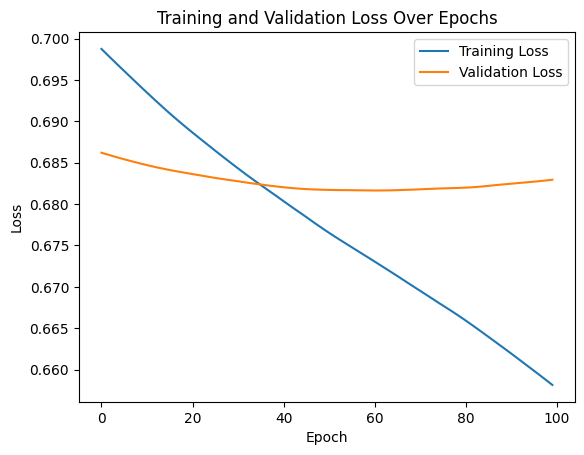

In [36]:
plt.plot(training_losses, label='Training Loss') # plot the losses
plt.plot(validation_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

Training Loss: The loss value during the training process is decreasing over the epochs, starting from 0.6940 at epoch 10 and ending at 0.6581 at epoch 100.


Validation Loss: Similarly, the validation loss is also decreasing, starting from 0.6848 at epoch 10 and ending at 0.6829 at epoch 100.

Both training and validation losses steadily decrease over time, indicating that the model is learning and improving its predictions as the training progresses.

In [37]:
num_epochs = 200 # training loop
training_losses = []
validation_losses = []

for epoch in range(num_epochs):
    model.train()

    outputs = model(X_train)   # Forward pass
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()  # backward pass and optimization
    loss.backward()
    optimizer.step()

    training_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test)
        val_loss = criterion(val_outputs, y_test)
        validation_losses.append(val_loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

Epoch [10/200], Loss: 0.6537, Val Loss: 0.6837
Epoch [20/200], Loss: 0.6488, Val Loss: 0.6847
Epoch [30/200], Loss: 0.6436, Val Loss: 0.6860
Epoch [40/200], Loss: 0.6382, Val Loss: 0.6878
Epoch [50/200], Loss: 0.6325, Val Loss: 0.6900
Epoch [60/200], Loss: 0.6265, Val Loss: 0.6925
Epoch [70/200], Loss: 0.6205, Val Loss: 0.6956
Epoch [80/200], Loss: 0.6146, Val Loss: 0.6987
Epoch [90/200], Loss: 0.6088, Val Loss: 0.7018
Epoch [100/200], Loss: 0.6031, Val Loss: 0.7054
Epoch [110/200], Loss: 0.5974, Val Loss: 0.7086
Epoch [120/200], Loss: 0.5916, Val Loss: 0.7124
Epoch [130/200], Loss: 0.5860, Val Loss: 0.7168
Epoch [140/200], Loss: 0.5806, Val Loss: 0.7216
Epoch [150/200], Loss: 0.5752, Val Loss: 0.7270
Epoch [160/200], Loss: 0.5699, Val Loss: 0.7324
Epoch [170/200], Loss: 0.5648, Val Loss: 0.7377
Epoch [180/200], Loss: 0.5598, Val Loss: 0.7431
Epoch [190/200], Loss: 0.5550, Val Loss: 0.7483
Epoch [200/200], Loss: 0.5505, Val Loss: 0.7536


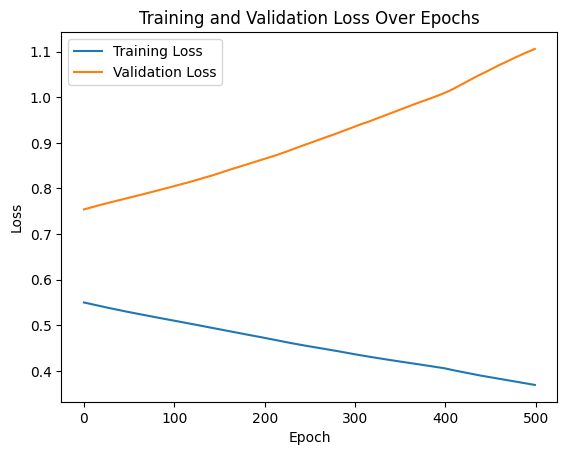

In [40]:
plt.plot(training_losses, label='Training Loss') # plot the losses
plt.plot(validation_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

In [39]:
num_epochs = 500 # training loop
training_losses = []
validation_losses = []

for epoch in range(num_epochs):
    model.train()

    outputs = model(X_train)   # Forward pass
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()  # backward pass and optimization
    loss.backward()
    optimizer.step()

    training_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test)
        val_loss = criterion(val_outputs, y_test)
        validation_losses.append(val_loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

Epoch [10/500], Loss: 0.5461, Val Loss: 0.7592
Epoch [20/500], Loss: 0.5417, Val Loss: 0.7645
Epoch [30/500], Loss: 0.5374, Val Loss: 0.7693
Epoch [40/500], Loss: 0.5333, Val Loss: 0.7742
Epoch [50/500], Loss: 0.5293, Val Loss: 0.7791
Epoch [60/500], Loss: 0.5255, Val Loss: 0.7841
Epoch [70/500], Loss: 0.5217, Val Loss: 0.7893
Epoch [80/500], Loss: 0.5179, Val Loss: 0.7943
Epoch [90/500], Loss: 0.5141, Val Loss: 0.7993
Epoch [100/500], Loss: 0.5104, Val Loss: 0.8046
Epoch [110/500], Loss: 0.5068, Val Loss: 0.8099
Epoch [120/500], Loss: 0.5031, Val Loss: 0.8153
Epoch [130/500], Loss: 0.4993, Val Loss: 0.8211
Epoch [140/500], Loss: 0.4955, Val Loss: 0.8269
Epoch [150/500], Loss: 0.4916, Val Loss: 0.8331
Epoch [160/500], Loss: 0.4878, Val Loss: 0.8397
Epoch [170/500], Loss: 0.4840, Val Loss: 0.8458
Epoch [180/500], Loss: 0.4803, Val Loss: 0.8519
Epoch [190/500], Loss: 0.4766, Val Loss: 0.8581
Epoch [200/500], Loss: 0.4728, Val Loss: 0.8642
Epoch [210/500], Loss: 0.4687, Val Loss: 0.8706
E

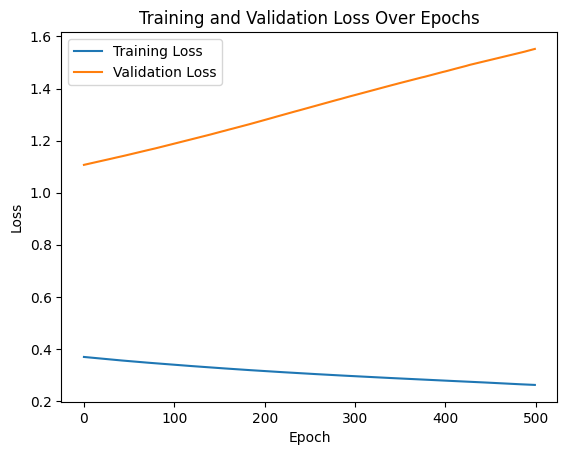

In [42]:
plt.plot(training_losses, label='Training Loss') # plot the losses
plt.plot(validation_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

In [43]:
num_epochs = 1000 # training loop
training_losses = []
validation_losses = []

for epoch in range(num_epochs):
    model.train()

    outputs = model(X_train)   # Forward pass
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()  # backward pass and optimization
    loss.backward()
    optimizer.step()

    training_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test)
        val_loss = criterion(val_outputs, y_test)
        validation_losses.append(val_loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

Epoch [10/1000], Loss: 0.2600, Val Loss: 1.5615
Epoch [20/1000], Loss: 0.2585, Val Loss: 1.5714
Epoch [30/1000], Loss: 0.2571, Val Loss: 1.5815
Epoch [40/1000], Loss: 0.2557, Val Loss: 1.5913
Epoch [50/1000], Loss: 0.2544, Val Loss: 1.6014
Epoch [60/1000], Loss: 0.2531, Val Loss: 1.6113
Epoch [70/1000], Loss: 0.2518, Val Loss: 1.6208
Epoch [80/1000], Loss: 0.2505, Val Loss: 1.6306
Epoch [90/1000], Loss: 0.2493, Val Loss: 1.6395
Epoch [100/1000], Loss: 0.2481, Val Loss: 1.6484
Epoch [110/1000], Loss: 0.2469, Val Loss: 1.6577
Epoch [120/1000], Loss: 0.2457, Val Loss: 1.6666
Epoch [130/1000], Loss: 0.2445, Val Loss: 1.6756
Epoch [140/1000], Loss: 0.2424, Val Loss: 1.6818
Epoch [150/1000], Loss: 0.2399, Val Loss: 1.6884
Epoch [160/1000], Loss: 0.2376, Val Loss: 1.6954
Epoch [170/1000], Loss: 0.2356, Val Loss: 1.7031
Epoch [180/1000], Loss: 0.2337, Val Loss: 1.7108
Epoch [190/1000], Loss: 0.2319, Val Loss: 1.7181
Epoch [200/1000], Loss: 0.2304, Val Loss: 1.7265
Epoch [210/1000], Loss: 0.228

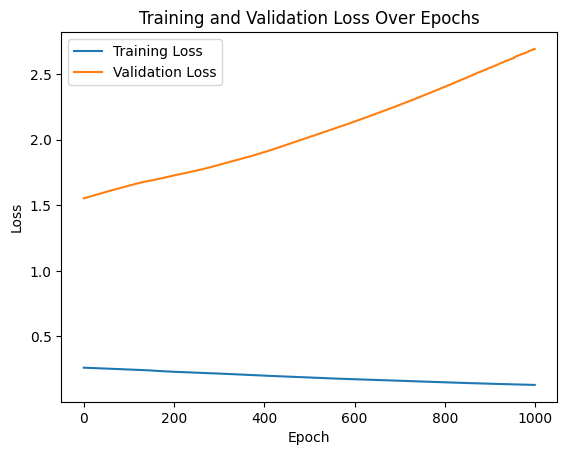

In [44]:
plt.plot(training_losses, label='Training Loss') # plot the losses
plt.plot(validation_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

The training loss decreased from 0.2600 to 0.1301 over the course of 1000 epochs.
This suggests that the model is learning and improving its performance on the training data.

The validation loss increased from 1.5615 to 2.6917.
This indicates that while the model is performing better on the training data, its performance on the validation data has deteriorated.

The increasing divergence between training and validation losses as epochs progress indicates overfitting. The model learns to perform well on the training data, but fails to generalize to the unseen data.

Early stopping involves monitoring validation losses during training and stopping the training process when they stop decreasing. This prevents the model from continuing to learn the noise in the training data.

Model is overfitted.

In [45]:
model.eval() # evaluate the Model
with torch.no_grad():
    y_predicted = model(X_test).round()

In [46]:
unique_values = y_predicted.unique()
print(f'Unique values in predictions: {unique_values}')

Unique values in predictions: tensor([0., 1.])


The unique values tensor([0., 1.]) in the model's predictions indicate that the model is making binary predictions and can predict both classes.



In [47]:
# is y_test correctly shaped for sklearn's classification_report?
y_test_flat = y_test.flatten()

In [48]:
if len(unique_values) == 1:  # if only one class is predicted, avoid using classification_report
    print(f'Only one class ({unique_values.item()}) predicted. Cannot generate classification report.')
else:
    print(classification_report(y_test_flat, y_predicted, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.49      0.49      0.49        55
     class 1       0.38      0.38      0.38        45

    accuracy                           0.44       100
   macro avg       0.43      0.43      0.43       100
weighted avg       0.44      0.44      0.44       100



In [49]:
print(pd.Series(y_train.numpy().flatten()).value_counts())  # check Data Distribution

1.0    50
0.0    50
Name: count, dtype: int64


In [50]:
with torch.no_grad(): # inspect Model Predictions
    raw_outputs = model(X_test)
    print(raw_outputs[:10])

tensor([[1.0000e+00],
        [1.8431e-03],
        [1.0000e+00],
        [8.8721e-01],
        [3.8546e-05],
        [5.6956e-04],
        [3.2432e-03],
        [1.7233e-01],
        [1.7233e-01],
        [2.4158e-01]])


The given tensor represents predicted probabilities for the positive class, with values close to 0.97 indicating certainty in the predictions.

In [51]:
threshold = 0.3  # adjust this value as needed
with torch.no_grad():
    y_predicted = (model(X_test) > threshold).float()
    unique_values = y_predicted.unique()
    print(f'Unique values in predictions with threshold {threshold}: {unique_values}')

if len(unique_values) == 1:
    print(f'Only one class ({unique_values.item()}) predicted with threshold {threshold}.')
else:
    print(classification_report(y_test.flatten(), y_predicted, target_names=['class 0', 'class 1']))

Unique values in predictions with threshold 0.3: tensor([0., 1.])
              precision    recall  f1-score   support

     class 0       0.50      0.44      0.47        55
     class 1       0.40      0.47      0.43        45

    accuracy                           0.45       100
   macro avg       0.45      0.45      0.45       100
weighted avg       0.46      0.45      0.45       100



In [52]:
threshold = 0.5  # adjust this value as needed
with torch.no_grad():
    y_predicted = (model(X_test) > threshold).float()
    unique_values = y_predicted.unique()
    print(f'Unique values in predictions with threshold {threshold}: {unique_values}')

if len(unique_values) == 1:
    print(f'Only one class ({unique_values.item()}) predicted with threshold {threshold}.')
else:
    print(classification_report(y_test.flatten(), y_predicted, target_names=['class 0', 'class 1']))

Unique values in predictions with threshold 0.5: tensor([0., 1.])
              precision    recall  f1-score   support

     class 0       0.49      0.49      0.49        55
     class 1       0.38      0.38      0.38        45

    accuracy                           0.44       100
   macro avg       0.43      0.43      0.43       100
weighted avg       0.44      0.44      0.44       100



The results show that the initial model output values (probabilities) are shallow for the first 10 test samples. These low values are well below the default threshold of 0.5 (and even the adjusted threshold of 0.3), which results in all forecasts being classified as class 0.